In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

FLATTEN_DIM = 28 * 28
TRAIN_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAIN_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

# transfer to float
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 200
print(trainImages[0])

NUM_DIGITS = 10

trainLabels = utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = utils.to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(FLATTEN_DIM,)))
model.add(Dense(64, activation='relu',))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

tbCallback = TensorBoard(log_dir="logs/demo70", histogram_freq=0, write_graph=True,
                         write_images=True)
trainHistory = model.fit(trainImages, trainLabels, epochs=10, callbacks=[tbCallback], validation_split=0.1)

predictLabels = model.predict_classes(testImages)
print("result=", predictLabels[:10])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2508 - accuracy: 0.9260 - val_loss: 0.1001 - val_accuracy: 0.9712
Epoch 2/10
1688/1688 [==============================] - 2s 951us/step - loss: 0.1067 - accuracy: 0.9669 - val_loss: 0.0917 - val_accuracy: 0.9735
Epoch 3/10
1688/1688 [==============================] - 2s 952us/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.0874 - val_accuracy: 0.9740
Epoch 4/10
1688/1688 [==============================] - 2s 945us/step - loss: 0.0556 - accuracy: 0.9819 - val_loss: 0.0831 - val_accuracy: 0.9732
Epoch 5/10
1688/1688 [==============================] - 2s 946us/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0776 - val_accuracy: 0.9782
Epoch 6/10
1688/1688 [==============================] - 2s 945us/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0864 - val_accuracy: 0.9780
Epoch 7/10
1688/1688 [==============================] - 2s 943us/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0921 - v

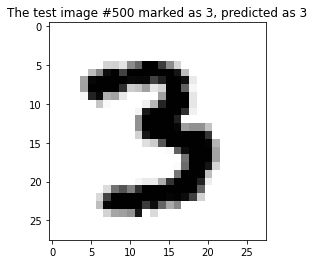

In [6]:

import matplotlib.pyplot as plt
def plotTestImage(index):
    plt.title("The test image #%d marked as %d, predicted as %d" % (index, test_labels[index], predictLabels[index]))
    plt.imshow(test_images[index], cmap='binary')
    plt.show()
plotTestImage(500)


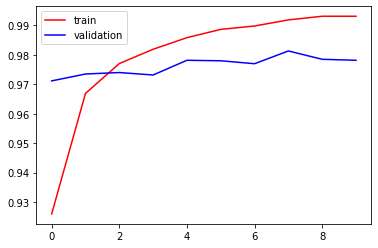

In [7]:
plt.plot(trainHistory.history['accuracy'],color='red')
plt.plot(trainHistory.history['val_accuracy'],color='blue')
plt.legend(['train','validation'])

In [8]:
import pandas as pd
pd.crosstab(test_labels, predictLabels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,0,2,1,0,1,1,2,1
1,1,1127,3,2,0,1,0,0,1,0
2,4,1,1005,7,1,0,3,5,5,1
3,3,0,4,991,0,3,0,5,2,2
4,3,0,1,1,956,0,4,3,3,11
5,2,0,0,12,0,860,3,5,7,3
6,7,3,0,2,4,7,931,0,4,0
7,1,1,10,2,0,0,0,1008,2,4
8,5,0,5,17,4,8,0,8,912,15


In [9]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [10]:
errors = measure1[(measure1.label==4)&(measure1.predict==9)]
errors

,label,predict
447,4,9
760,4,9
1242,4,9
2148,4,9
2678,4,9
2877,4,9
3533,4,9
4860,4,9
5936,4,9
8527,4,9


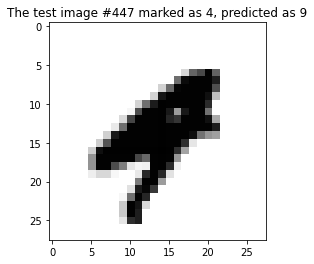

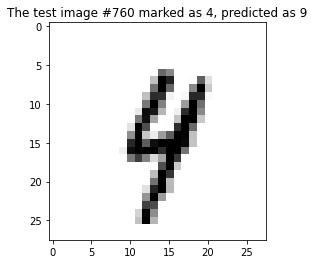

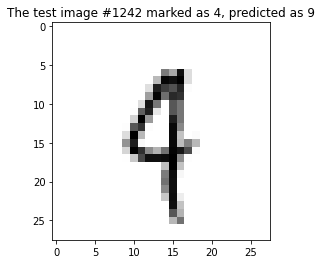

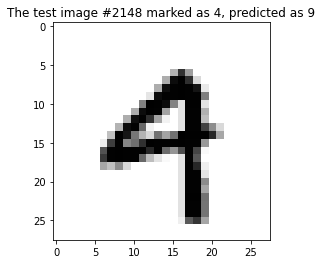

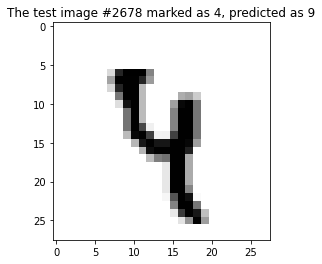

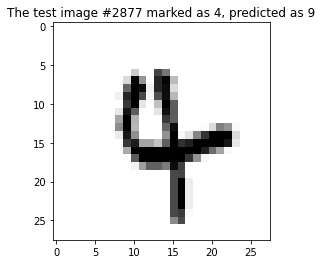

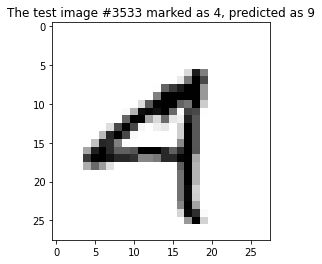

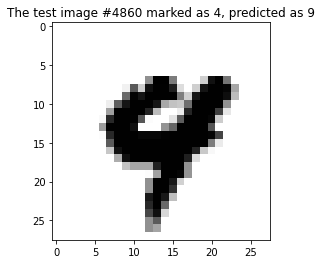

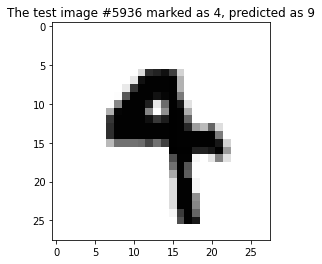

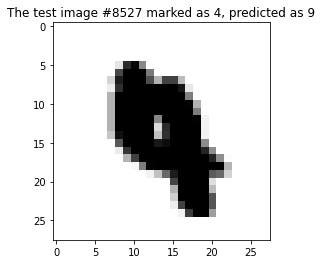

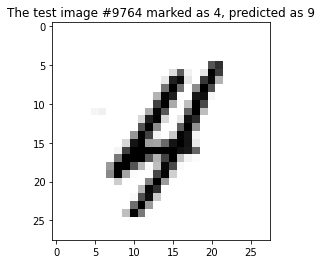

In [11]:
for i in errors.index:
    plotTestImage(i)